# Data Preprocessing
Here we clean a bit the listings database so that we could use it for further analysis 

In [67]:
import pandas as pd
df = pd.read_csv("listings.csv")

#Looking at how lmany rows contain NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Data columns (total 16 columns):
id                                50228 non-null int64
name                              50212 non-null object
host_id                           50228 non-null int64
host_name                         50220 non-null object
neighbourhood_group               50228 non-null object
neighbourhood                     50228 non-null object
latitude                          50228 non-null float64
longitude                         50228 non-null float64
room_type                         50228 non-null object
price                             50228 non-null int64
minimum_nights                    50228 non-null int64
number_of_reviews                 50228 non-null int64
last_review                       39937 non-null object
reviews_per_month                 39937 non-null float64
calculated_host_listings_count    50228 non-null int64
availability_365                  50228 non-null int64

In [68]:
#Printing the 20 first rows
df.iloc[:20]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2454,superCondo,2688,Ben,Manhattan,Midtown,40.755523,-73.967679,Entire home/apt,137,7,1,2019-01-30,1.00,1,65
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647486,-73.972370,Private room,149,1,9,2018-10-19,0.23,8,365
2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,1,43,2019-01-02,0.38,2,365
3,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.708558,-73.942362,Private room,70,5,39,2018-12-07,0.35,3,290
4,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809018,-73.941902,Private room,150,3,0,NaN,NaN,1,365
5,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685138,-73.959757,Entire home/apt,89,1,231,2019-01-17,4.37,1,162
6,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.798514,-73.943991,Entire home/apt,80,10,9,2018-11-19,0.11,1,48
7,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.747672,-73.974997,Entire home/apt,185,2,70,2018-12-02,0.59,1,0
8,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.686882,-73.955957,Private room,60,45,49,2017-10-05,0.42,1,0
9,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.764887,-73.984930,Private room,79,2,410,2019-01-14,3.46,1,150


In [91]:
def transform_nan_values(value):
    if pd.isna(value):
        return 0.0
    return value

In [92]:
#When a host has no review for a listing, we assign the value of review per month to 0
df['reviews_per_month'] = df['reviews_per_month'].apply(transform_nan_values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50204 entries, 0 to 50227
Data columns (total 16 columns):
id                                50204 non-null int64
name                              50204 non-null object
host_id                           50204 non-null int64
host_name                         50204 non-null object
neighbourhood_group               50204 non-null object
neighbourhood                     50204 non-null object
latitude                          50204 non-null float64
longitude                         50204 non-null float64
room_type                         50204 non-null object
price                             50204 non-null int64
minimum_nights                    50204 non-null int64
number_of_reviews                 50204 non-null int64
last_review                       50204 non-null datetime64[ns]
reviews_per_month                 50204 non-null float64
calculated_host_listings_count    50204 non-null int64
availability_365                  50204 non-nu

In [71]:
def transform_nan_to_date(value):
    if pd.isna(value):
        return '2020-01-01'
    return value

In [72]:
#When a host has no review for a listing, we assign the value of last_review to 2020-01-01, we has not happened yet
df['last_review'] = df['last_review'].apply(transform_nan_to_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Data columns (total 16 columns):
id                                50228 non-null int64
name                              50212 non-null object
host_id                           50228 non-null int64
host_name                         50220 non-null object
neighbourhood_group               50228 non-null object
neighbourhood                     50228 non-null object
latitude                          50228 non-null float64
longitude                         50228 non-null float64
room_type                         50228 non-null object
price                             50228 non-null int64
minimum_nights                    50228 non-null int64
number_of_reviews                 50228 non-null int64
last_review                       50228 non-null object
reviews_per_month                 50228 non-null float64
calculated_host_listings_count    50228 non-null int64
availability_365                  50228 non-null int64

In [73]:
#Convert date to datetime object to manipulate it better for next analysis
import datetime
df['last_review'] = df['last_review'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))

In [74]:
#Drop any row that has nan values
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50204 entries, 0 to 50227
Data columns (total 16 columns):
id                                50204 non-null int64
name                              50204 non-null object
host_id                           50204 non-null int64
host_name                         50204 non-null object
neighbourhood_group               50204 non-null object
neighbourhood                     50204 non-null object
latitude                          50204 non-null float64
longitude                         50204 non-null float64
room_type                         50204 non-null object
price                             50204 non-null int64
minimum_nights                    50204 non-null int64
number_of_reviews                 50204 non-null int64
last_review                       50204 non-null datetime64[ns]
reviews_per_month                 50204 non-null float64
calculated_host_listings_count    50204 non-null int64
availability_365                  50204 non-nu

In [75]:
#More than 200 different values, need to select the meaningful neighbourhoods to build the model
print(df["neighbourhood"].unique())
len(df["neighbourhood"].unique())

['Midtown' 'Kensington' 'Williamsburg' 'Harlem' 'Clinton Hill'
 'East Harlem' 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen"
 'Upper West Side' 'Flatiron District' 'Chinatown' 'Upper East Side'
 'South Slope' 'West Village' 'Fort Greene' 'Chelsea' 'Crown Heights'
 'Park Slope' 'East Village' 'Windsor Terrace' 'Inwood' 'Greenpoint'
 'Bushwick' 'Flatbush' 'Lower East Side' 'Prospect-Lefferts Gardens'
 'Long Island City' 'Kips Bay' 'SoHo' 'Prospect Heights'
 'Washington Heights' 'Woodside' 'Brooklyn Heights' 'Carroll Gardens'
 'Gowanus' 'Flatlands' 'Cobble Hill' 'Flushing' 'Boerum Hill' 'Sunnyside'
 'DUMBO' 'St. George' 'Highbridge' 'Ridgewood' 'Port Morris'
 'Morningside Heights' 'Sunset Park' 'Middle Village' 'NoHo'
 'Roosevelt Island' 'Little Italy' 'East Flatbush' 'Tompkinsville'
 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge' 'Two Bridges'
 'Rockaway Beach' 'Forest Hills' 'Nolita' 'Greenwich Village' 'Woodlawn'
 'University Heights' 'Gramercy' 'Allerton' 'East New York'
 '

222

In [76]:
borough_group = df.groupby('neighbourhood')
borough_group.size()

neighbourhood
Allerton                        38
Arden Heights                    2
Arrochar                        22
Arverne                         69
Astoria                        947
Bath Beach                      14
Battery Park City               67
Bay Ridge                      141
Bay Terrace                      5
Bay Terrace, Staten Island       2
Baychester                       6
Bayside                         42
Bayswater                       15
Bedford-Stuyvesant            3723
Belle Harbor                     9
Bellerose                        8
Belmont                         26
Bensonhurst                     76
Bergen Beach                    14
Boerum Hill                    181
Borough Park                   134
Breezy Point                     2
Briarwood                       55
Brighton Beach                  75
Bronxdale                       21
Brooklyn Heights               155
Brownsville                     62
Bull's Head                      6
Bushwi

In [86]:
_200 = [value for value in borough_group.size()>200]
for i in range(len(_200)):
    if _200[i]:
        print(borough_group.size().index[i], borough_group.size().iloc[i])

Astoria 947
Bedford-Stuyvesant 3723
Bushwick 2466
Carroll Gardens 255
Chelsea 1208
Chinatown 390
Clinton Hill 587
Crown Heights 1603
Ditmars Steinway 329
East Flatbush 448
East Harlem 1182
East New York 202
East Village 1956
Elmhurst 240
Financial District 599
Flatbush 623
Flushing 403
Fort Greene 481
Gowanus 251
Gramercy 395
Greenpoint 1192
Greenwich Village 403
Harlem 2832
Hell's Kitchen 2141
Inwood 252
Jamaica 210
Kips Bay 499
Long Island City 553
Lower East Side 963
Midtown 1671
Morningside Heights 366
Murray Hill 531
Nolita 302
Park Slope 525
Prospect Heights 366
Prospect-Lefferts Gardens 544
Ridgewood 407
SoHo 375
South Slope 299
Sunnyside 335
Sunset Park 391
Theater District 237
Upper East Side 1891
Upper West Side 2098
Washington Heights 883
West Village 824
Williamsburg 4149
Woodside 222


In [78]:
#Just three types, one-hot encoding nice
print(df["room_type"].unique())
len(df["room_type"].unique())

['Entire home/apt' 'Private room' 'Shared room']


3

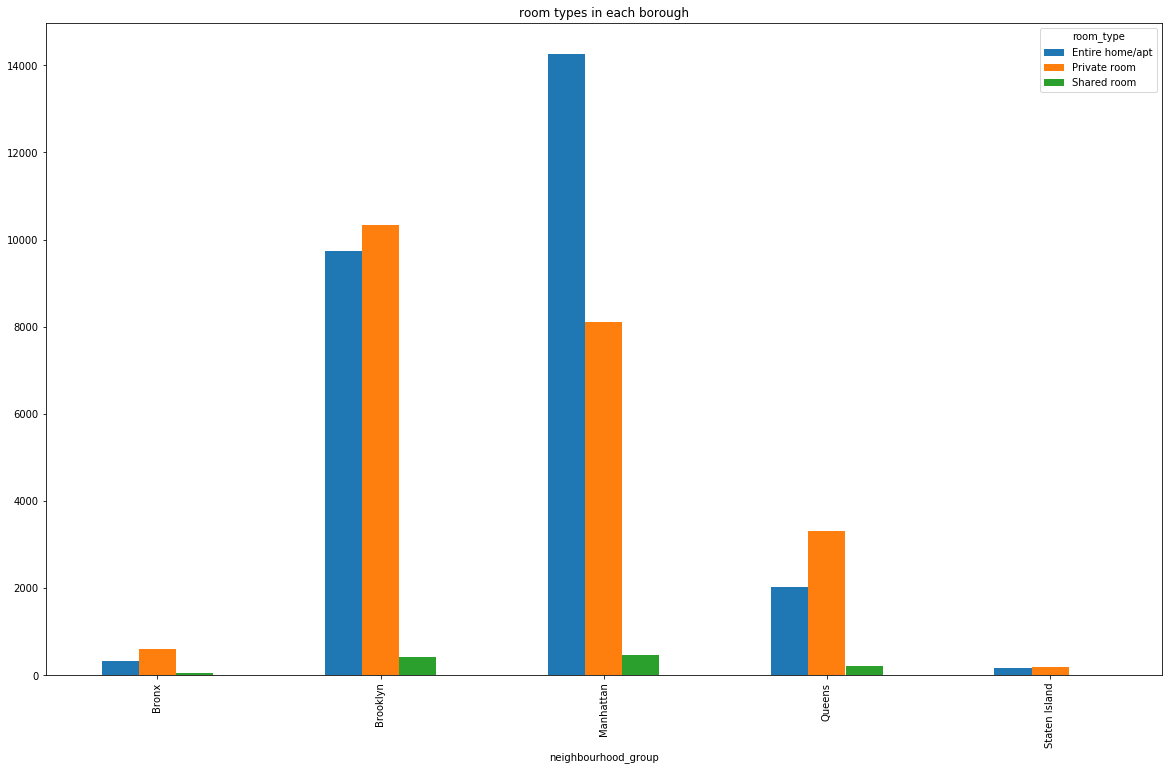

In [79]:
#Visualize the repartition of types of rooms per borough
borough_room = df.groupby(['neighbourhood_group', "room_type"])
borough_room.size().unstack().plot(kind='bar',title="room types in each borough",figsize=(20,12))

In [104]:
#Perform the one hot encoding
#First dataset where we one ho code per borough
df_b_r = pd.get_dummies(df, columns = ['neighbourhood_group'])
df_b_r = pd.get_dummies(df_b_r, columns = ['room_type'])
#Second dataset where we select the three neighbourhood on which we would perform the sentiment analysis
df_n = df[(df["neighbourhood"] == 'Harlem') | (df["neighbourhood"] == 'Upper West Side') | (df["neighbourhood"] == 'Morningside Heights')]
df_n = pd.get_dummies(df_n, columns = ['room_type'])
df_n = pd.get_dummies(df_n, columns = ['neighbourhood'])

In [105]:
df_b_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50204 entries, 0 to 50227
Data columns (total 22 columns):
id                                   50204 non-null int64
name                                 50204 non-null object
host_id                              50204 non-null int64
host_name                            50204 non-null object
neighbourhood                        50204 non-null object
latitude                             50204 non-null float64
longitude                            50204 non-null float64
price                                50204 non-null int64
minimum_nights                       50204 non-null int64
number_of_reviews                    50204 non-null int64
last_review                          50204 non-null datetime64[ns]
reviews_per_month                    50204 non-null float64
calculated_host_listings_count       50204 non-null int64
availability_365                     50204 non-null int64
neighbourhood_group_Bronx            50204 non-null uint8
nei

In [106]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5296 entries, 4 to 50220
Data columns (total 20 columns):
id                                   5296 non-null int64
name                                 5296 non-null object
host_id                              5296 non-null int64
host_name                            5296 non-null object
neighbourhood_group                  5296 non-null object
latitude                             5296 non-null float64
longitude                            5296 non-null float64
price                                5296 non-null int64
minimum_nights                       5296 non-null int64
number_of_reviews                    5296 non-null int64
last_review                          5296 non-null datetime64[ns]
reviews_per_month                    5296 non-null float64
calculated_host_listings_count       5296 non-null int64
availability_365                     5296 non-null int64
room_type_Entire home/apt            5296 non-null uint8
room_type_Private r

In [107]:
#Delete the not useful features for the model
del df_n['id']
del df_n['host_id']
del df_n['name']
del df_n['host_name']
del df_n['neighbourhood_group']
del df_n['latitude']
del df_n['longitude']
del df_n['last_review']
del df_n['calculated_host_listings_count']
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5296 entries, 4 to 50220
Data columns (total 11 columns):
price                                5296 non-null int64
minimum_nights                       5296 non-null int64
number_of_reviews                    5296 non-null int64
reviews_per_month                    5296 non-null float64
availability_365                     5296 non-null int64
room_type_Entire home/apt            5296 non-null uint8
room_type_Private room               5296 non-null uint8
room_type_Shared room                5296 non-null uint8
neighbourhood_Harlem                 5296 non-null uint8
neighbourhood_Morningside Heights    5296 non-null uint8
neighbourhood_Upper West Side        5296 non-null uint8
dtypes: float64(1), int64(4), uint8(6)
memory usage: 279.3 KB


In [108]:
#Delete the not useful features for the model
del df_b_r['id']
del df_b_r['host_id']
del df_b_r['name']
del df_b_r['host_name']
del df_b_r['neighbourhood']
del df_b_r['latitude']
del df_b_r['longitude']
del df_b_r['last_review']
del df_b_r['calculated_host_listings_count']
df_b_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50204 entries, 0 to 50227
Data columns (total 13 columns):
price                                50204 non-null int64
minimum_nights                       50204 non-null int64
number_of_reviews                    50204 non-null int64
reviews_per_month                    50204 non-null float64
availability_365                     50204 non-null int64
neighbourhood_group_Bronx            50204 non-null uint8
neighbourhood_group_Brooklyn         50204 non-null uint8
neighbourhood_group_Manhattan        50204 non-null uint8
neighbourhood_group_Queens           50204 non-null uint8
neighbourhood_group_Staten Island    50204 non-null uint8
room_type_Entire home/apt            50204 non-null uint8
room_type_Private room               50204 non-null uint8
room_type_Shared room                50204 non-null uint8
dtypes: float64(1), int64(4), uint8(8)
memory usage: 2.7 MB


In [110]:
#save the new dataframe to a csv file
df_b_r.to_csv("listings_borough.csv")
df_n.to_csv("listings_neibourhood.csv")